## Observations and Insights 

The treatments that were found to be more effective had more data points. There's a near even number of male and female mice in the study. There's a positive correlation between mouse weight and tumor volume. The more effective treatments also had smaller variances, meaning that the data points are very close to the mean and to each other. Ketapril was the worst treatment.

In [11]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.axes as ax
import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_df_path = "data/Mouse_metadata.csv"
study_df_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_df_path)
study_df = pd.read_csv(study_df_path)

# Combine the data into a single dataset

mouse_study_df= pd.merge(mouse_df, study_df, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Checking the number of mice.
len(mouse_study_df)

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
grouped_mouse_study_df = mouse_study_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen")

#Finding mean and median + merging 

mean = grouped_mouse_study_df.mean()
median = grouped_mouse_study_df.median()

Summary_statistics_df = pd.merge(mean, median, on="Drug Regimen", suffixes= ["Mean", "Median"])

#Finding variance and standard deviation and merging them

variance = grouped_mouse_study_df.var()
Standard_deviation = grouped_mouse_study_df.std()

var_std_table = pd.merge(variance, Standard_deviation, on="Drug Regimen", suffixes=["Variance", "Standard Deviation"])

Summary_statistics_df = pd.merge(Summary_statistics_df, var_std_table, on="Drug Regimen")

#Finding SEM and merging 

SEM = grouped_mouse_study_df.sem()

Summary_statistics_df = pd.merge(Summary_statistics_df, SEM, on="Drug Regimen")

Summary_statistics_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume (mm3) SEM"}, inplace=True)

Summary_statistics_df

,Tumor Volume (mm3)Mean,Tumor Volume (mm3)Median,Tumor Volume (mm3)Variance,Tumor Volume (mm3)Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

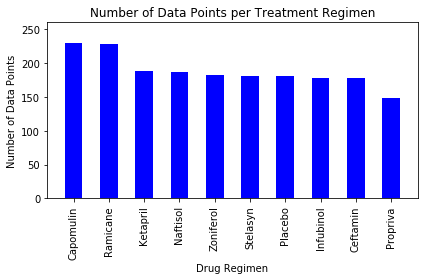

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_study_df["Drug Regimen"].value_counts().plot(kind="bar", color = "blue", title="Number of Data Points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlim(-0.75, 9.75)
plt.ylim(0, 260)
plt.tight_layout()

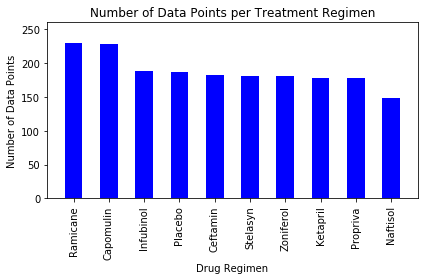

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(mouse_study_df["Drug Regimen"].unique(), mouse_study_df["Drug Regimen"].value_counts(), color ="blue", align="center", width=0.5)
plt.xticks(rotation="vertical")
plt.title("Number of Data Points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlim(-0.75, 9.75)
plt.ylim(0, 260)
plt.tight_layout()
plt.show()


(-1.1065502689644005,
 1.1003119175697333,
 -1.1079114197007642,
 1.1041200173094385)

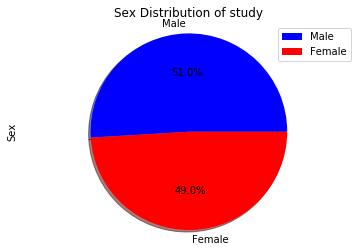

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_study_df["Sex"].value_counts().plot(kind="pie", colors=["blue", "red"], shadow=True, autopct="%1.1f%%", title="Sex Distribution of Study")
plt.legend(loc="best")
plt.axis("equal")


(-1.1065502689644005,
 1.1003119175697333,
 -1.1079114197007642,
 1.1041200173094385)

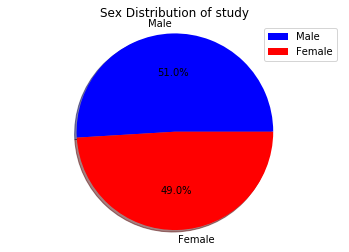

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_study_df["Sex"].value_counts(), labels= mouse_study_df["Sex"].unique(), colors=["blue", "red"], shadow=True, autopct="%1.1f%%")
plt.title("Sex Distribution of Study")
plt.legend(loc="best")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [55]:
# Start by getting the last (greatest) timepoint for each mouse
# Put treatments into a list for for loop (and later for plot labels)

mouse_ids = mouse_study_df["Mouse ID"].unique()
mouse_ids

last_timepoints = pd.DataFrame({"Mouse ID":[], "Drug Regimen":[], "Sex":[], "Age_months":[], "Weight (g)":[],
                                "Timepoint":[], "Tumor Volume (mm3)":[], "Metastatic Sites":[]})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

for mouse in mouse_ids:
    sample_mouse = mouse_study_df.loc[mouse_study_df["Mouse ID"] == mouse,:]
    sample_mouse = sample_mouse.sort_values(by="Timepoint", ascending=True)
    last_timepoint = sample_mouse.iloc[-1,:]
    last_timepoints = last_timepoints.append(last_timepoint, ignore_index=True)

last_timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21.0,16.0,45.0,22.050126,1.0
1,s185,Capomulin,Female,3.0,17.0,45.0,23.343598,1.0
2,x401,Capomulin,Female,16.0,15.0,45.0,28.484033,0.0
3,m601,Capomulin,Male,22.0,17.0,45.0,28.430964,1.0
4,g791,Ramicane,Male,11.0,16.0,45.0,29.128472,1.0
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21.0,28.0,5.0,45.934712,0.0
244,z435,Propriva,Female,12.0,26.0,10.0,48.710661,0.0
245,z581,Infubinol,Female,24.0,25.0,45.0,62.754451,3.0
246,z795,Naftisol,Female,13.0,29.0,45.0,65.741070,3.0


In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

last_timepoints_of_top_regimens = last_timepoints.loc[((last_timepoints["Drug Regimen"] == "Capomulin") | \
                                (last_timepoints["Drug Regimen"] == "Ramicane") | \
                                (last_timepoints["Drug Regimen"] == "Infubinol") | \
                                (last_timepoints["Drug Regimen"] == "Ceftamin")),
                                ["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
last_timepoints_of_top_regimens



,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472
...,...,...,...
234,x822,Ceftamin,61.386660
236,y163,Infubinol,67.685569
240,y769,Ceftamin,68.594745
241,y865,Ceftamin,64.729837


In [61]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


quartiles = last_timepoints_of_top_regimens["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)

outliers = last_timepoints_of_top_regimens.loc[((last_timepoints_of_top_regimens["Tumor Volume (mm3)"] < lowerbound) | \
                                (last_timepoints_of_top_regimens["Tumor Volume (mm3)"] > upperbound)),:]
if len(outliers) > 0:
    print("There are potential outliers")
else:
    print("There are no outliers.")
    
    
       

There are no outliers.


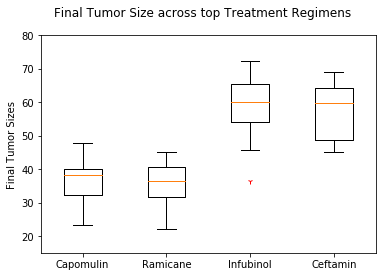

In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin = last_timepoints_of_top_regimens.loc[last_timepoints_of_top_regimens["Drug Regimen"] == "Capomulin",["Tumor Volume (mm3)"]]
Ramicane = last_timepoints_of_top_regimens.loc[last_timepoints_of_top_regimens["Drug Regimen"] == "Ramicane",["Tumor Volume (mm3)"]]
Infubinol = last_timepoints_of_top_regimens.loc[last_timepoints_of_top_regimens["Drug Regimen"] == "Infubinol",["Tumor Volume (mm3)"]]
Ceftamin = last_timepoints_of_top_regimens.loc[last_timepoints_of_top_regimens["Drug Regimen"] == "Ceftamin",["Tumor Volume (mm3)"]]

top_regimens = [Capomulin["Tumor Volume (mm3)"], Ramicane["Tumor Volume (mm3)"], Infubinol["Tumor Volume (mm3)"],
                Ceftamin["Tumor Volume (mm3)"]]

red_tri = dict(markerfacecolor="red", markeredgecolor= "red", marker= "1")

fig, ax1 = plt.subplots(sharey=True)
fig.suptitle("Final Tumor Size across top Treatment Regimens")

ax1.boxplot(top_regimens, flierprops=red_tri)
ax1.set_ylabel("Final Tumor Sizes")
ax1.set(xticklabels=["Capomulin", "Ramicane","Infubinol", "Ceftamin"])
ax1.set_ylim(15, 80)
            
plt.show()

## Line and Scatter Plots

Which mouse would you like to look for? ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157'] u364


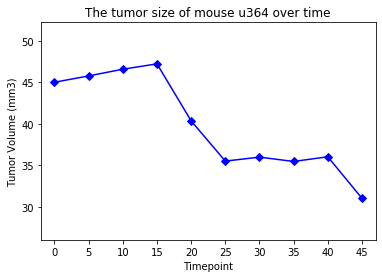

In [68]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin",
                           ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

mouse_id = input(f"Which mouse would you like to look for? {mouse['Mouse ID'].unique()} ")
# mouse_id = "s185"

mouse = mouse.loc[mouse["Mouse ID"] == mouse_id, ["Timepoint", "Tumor Volume (mm3)"]]

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], color = "blue", marker="D")
plt.title(f"The tumor size of mouse {mouse_id} over time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.xlim(-2, 47)
plt.ylim(min(mouse["Tumor Volume (mm3)"])-5, max(mouse["Tumor Volume (mm3)"])+5)
plt.xticks(np.arange(0,50,5))

plt.show()

In [65]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin",
                                  ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
mouse_weight = mouse_weight.groupby("Mouse ID").mean()

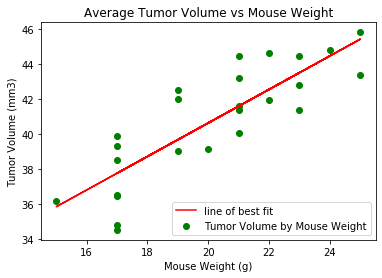

In [66]:
plt.scatter(mouse_weight["Weight (g)"], mouse_weight["Tumor Volume (mm3)"], marker='o', color='green', label="Tumor Volume by Mouse Weight")
plt.title("Average Tumor Volume vs Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight["Weight (g)"], mouse_weight["Tumor Volume (mm3)"])
regress_value = slope * mouse_weight["Weight (g)"] + intercept
plt.plot(mouse_weight["Weight (g)"], regress_value, color="red", label="line of best fit")
plt.legend(loc="best")

plt.show()

## Correlation and Regression

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight["Weight (g)"], mouse_weight["Tumor Volume (mm3)"])
round(correlation[0],2)

0.84